In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

import scipy.stats as stats
from sklearn import preprocessing

%matplotlib inline

In [156]:
df_orig = pd.read_excel("MNCH Country Segmentation.xlsx",sheetname="Sheet1")
df_orig.columns = ['Country', 'WB Geo', 'Code', 'Code Display', 'MMR', 'H.E. per capita', 'FBB %', 'U5 deaths', 'M deaths', 'MMR-based Segmentation']
df_orig.head()

,Country,WB Geo,Code,Code Display,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,MMR-based Segmentation
0,Lesotho,Lesotho,LSO,NaN,487,105.112753,76.5,5570,300,Inefficient
1,Angola,Angola,AGO,AGO,477,179.357854,45.8,169310,5400,Inefficient
2,Congo,"Congo, Rep.",COG,NaN,442,161.638601,91.5,7269,740,Inefficient
3,Swaziland,Swaziland,SWZ,NaN,389,247.896425,87.7,2221,150,Inefficient
4,Equatorial Guinea,Equatorial Guinea,GNQ,NaN,342,663.054229,67.3,2655,100,Inefficient


### Read in avg years of schooling for females

In [157]:
df_edu = pd.read_excel(".\DataSets\YearsOfSchoolingFemale.xlsx",sheetname="YearsOfSchoolingFemale")
df_edu.head()

,HDI Rank (2015),Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,FemaleYearsOfSchooling 2015
0,169,Afghanistan,NaN,NaN,0.6,4.9,7.2,7.6,7.9,8.1,8.3,8.3
1,75,Albania,11.3,10.1,10.6,11.4,13.6,14.4,14.4,14.4,14.4,14.4
2,83,Algeria,NaN,NaN,11.0,12.4,14.2,14.6,14.6,14.6,14.6,14.6
3,150,Angola,NaN,3.5,4.5,6.4,8.2,7.9,8.7,8.7,8.7,8.7
4,62,Antigua and Barbuda,NaN,NaN,NaN,15.2,14.2,13.7,14.6,14.6,14.6,14.6


In [158]:
df_edu = df_edu[['Country','FemaleYearsOfSchooling 2015']]
df_edu.head()

,Country,FemaleYearsOfSchooling 2015
0,Afghanistan,8.3
1,Albania,14.4
2,Algeria,14.6
3,Angola,8.7
4,Antigua and Barbuda,14.6


### strip whitespace from data

In [159]:
df_edu = df_edu.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_edu.head()

,Country,FemaleYearsOfSchooling 2015
0,Afghanistan,8.3
1,Albania,14.4
2,Algeria,14.6
3,Angola,8.7
4,Antigua and Barbuda,14.6


### Merging datasets. 

In [166]:
df_mrg = pd.merge(df_orig,df_edu, on='Country')
df_mrg.describe()

,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,FemaleYearsOfSchooling 2015
count,74.000000,74.000000,74.000000,74.000000,74.000000,71.000000
mean,337.567568,161.646207,68.404054,43437.378378,2334.094595,10.226761
std,251.739596,196.252932,22.783312,68474.671777,3362.344486,2.471839
min,25.000000,13.670830,11.500000,209.000000,15.000000,3.800000
25%,138.500000,38.384131,54.900000,5547.500000,190.000000,8.650000
50%,290.500000,80.751614,70.900000,19829.500000,1020.000000,10.500000
75%,484.500000,204.278172,89.575000,52116.750000,3450.000000,12.000000
max,1360.000000,958.981766,99.900000,431568.000000,22000.000000,15.400000


#### Four countries missing from merged set.

In [167]:

df = pd.merge(df_orig, df_edu, how='outer', indicator=True)
rows_in_df1_not_in_df2 = df[df['_merge']=='left_only'][df_orig.columns]
rows_in_df1_not_in_df2


# df_mrg.reset_index(drop=True)
# df_orig.reset_index(drop=True)
# df_mrg[df_mrg['Country'] != df_orig['Country']]

,Country,WB Geo,Code,Code Display,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,MMR-based Segmentation
25,Guinea-Bissau,Guinea-Bissau,GNB,NaN,549.0,37.277088,44.0,5883.0,370.0,Low Service Utilization
29,"Tanzania, United Republic of",Tanzania,TZA,TZA,398.0,51.717476,62.6,98180.0,8200.0,Low Service Utilization
33,Haiti,Haiti,HTI,NaN,359.0,61.455122,35.9,17841.0,950.0,Low Service Utilization
72,Somalia,Somalia,SOM,NaN,732.0,33.000000,9.4,60537.0,3400.0,Very Weak HS


##### Missing data on Haiti and Somalis
#####  Country names Tanzania and Guinea spelled differently in education data ( needs to be fixed after verification)

### Merge dataset Education.xlsx

In [168]:
df_mrg.head()

,Country,WB Geo,Code,Code Display,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,MMR-based Segmentation,FemaleYearsOfSchooling 2015
0,Lesotho,Lesotho,LSO,NaN,487,105.112753,76.5,5570,300,Inefficient,11.2
1,Angola,Angola,AGO,AGO,477,179.357854,45.8,169310,5400,Inefficient,8.7
2,Congo,"Congo, Rep.",COG,NaN,442,161.638601,91.5,7269,740,Inefficient,11.0
3,Swaziland,Swaziland,SWZ,NaN,389,247.896425,87.7,2221,150,Inefficient,11.0
4,Equatorial Guinea,Equatorial Guinea,GNQ,NaN,342,663.054229,67.3,2655,100,Inefficient,NaN


### Read in data on health expenditure

In [185]:
df_eduexp = pd.read_excel(".\DataSets\Education.xlsx",sheetname="Pivoted Data 2014")
df_eduexp.head()

,Country,General government expenditure,General government expenditure on health,Out of pocket expenditure,Private expenditure on health
0,Afghanistan,100.0,11.998628,21.382509,21.476185
1,Albania,100.0,9.369005,9.372701,9.402056
2,Algeria,100.0,9.904623,3.606894,3.707581
3,Andorra,100.0,27.915295,5.703872,7.860676
4,Angola,100.0,5.004294,1.866159,2.783847


In [186]:
df_eduexp.columns = ['Country', 'General government expenditure 2014','General government expenditure on health 2014','Out of pocket expenditure 2014','Private expenditure on health 2014']
df_eduexp.drop(['General government expenditure 2014'], axis=1, inplace=True)
df_eduexp.head()

,Country,General government expenditure on health 2014,Out of pocket expenditure 2014,Private expenditure on health 2014
0,Afghanistan,11.998628,21.382509,21.476185
1,Albania,9.369005,9.372701,9.402056
2,Algeria,9.904623,3.606894,3.707581
3,Andorra,27.915295,5.703872,7.860676
4,Angola,5.004294,1.866159,2.783847


In [187]:
#strip whitespace from columns
df_eduexp = df_eduexp.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df_eduexp.head()

,Country,General government expenditure on health 2014,Out of pocket expenditure 2014,Private expenditure on health 2014
0,Afghanistan,11.998628,21.382509,21.476185
1,Albania,9.369005,9.372701,9.402056
2,Algeria,9.904623,3.606894,3.707581
3,Andorra,27.915295,5.703872,7.860676
4,Angola,5.004294,1.866159,2.783847


In [211]:
df_edumerged = pd.merge(df_mrg,df_eduexp, on='Country')
df_edumerged.describe()

,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,FemaleYearsOfSchooling 2015,General government expenditure on health 2014,Out of pocket expenditure 2014,Private expenditure on health 2014
count,72.000000,72.000000,72.000000,72.000000,72.000000,69.000000,72.000000,72.000000,72.000000
mean,334.458333,162.971965,68.005556,40283.236111,2086.152778,10.202899,9.706422,8.585378,11.510395
std,251.246971,198.193582,22.884935,61920.347271,2463.326296,2.468327,4.150000,7.582871,9.080587
min,25.000000,13.670830,11.500000,209.000000,15.000000,3.800000,2.443898,0.000000,0.000000
25%,136.500000,39.373497,54.700000,5066.000000,187.500000,8.700000,6.729862,3.550797,5.534397
50%,290.500000,80.751614,70.700000,19829.500000,1020.000000,10.500000,9.221680,6.765815,9.424752
75%,479.500000,196.148868,88.325000,48228.250000,3350.000000,11.900000,11.939192,12.451937,14.822796
max,1360.000000,958.981766,99.900000,431568.000000,11000.000000,15.400000,23.951228,41.141988,52.989262


In [212]:
df_edumerged.head()

,Country,WB Geo,Code,Code Display,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,MMR-based Segmentation,FemaleYearsOfSchooling 2015,General government expenditure on health 2014,Out of pocket expenditure 2014,Private expenditure on health 2014
0,Lesotho,Lesotho,LSO,NaN,487,105.112753,76.5,5570,300,Inefficient,11.2,13.082143,2.832396,4.104084
1,Angola,Angola,AGO,AGO,477,179.357854,45.8,169310,5400,Inefficient,8.7,5.004294,1.866159,2.783847
2,Congo,"Congo, Rep.",COG,NaN,442,161.638601,91.5,7269,740,Inefficient,11.0,8.706360,1.864743,1.941998
3,Swaziland,Swaziland,SWZ,NaN,389,247.896425,87.7,2221,150,Inefficient,11.0,16.578529,2.252433,5.318049
4,Equatorial Guinea,Equatorial Guinea,GNQ,NaN,342,663.054229,67.3,2655,100,Inefficient,NaN,6.957163,1.818027,2.067116


In [199]:
df = pd.merge(df_mrg, df_eduexp, how='outer', indicator=True)
rows_in_df1_not_in_df2 = df[df['_merge']=='left_only'][df_mrg.columns]
rows_in_df1_not_in_df2

,Country,WB Geo,Code,Code Display,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,MMR-based Segmentation,FemaleYearsOfSchooling 2015
10,Bolivia (Plurinational State of),Bolivia,BOL,NaN,206.0,208.784194,70.8,9415.0,520.0,Inefficient,13.5
72,Congo (Democratic Republic of the),"Congo, Dem. Rep.",COD,COD,693.0,19.053690,94.7,304558.0,22000.0,Very Weak HS,8.6


#### Congo and Bolivia missing in education expenditure dataset. 

### Cluster Analysis on merged education dataset

In [222]:
df_norm = df_edumerged[['MMR','H.E. per capita','FBB %','U5 deaths','M deaths', 'FemaleYearsOfSchooling 2015', 'General government expenditure on health 2014', 'Out of pocket expenditure 2014','Private expenditure on health 2014']]
df_norm.head()

,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,FemaleYearsOfSchooling 2015,General government expenditure on health 2014,Out of pocket expenditure 2014,Private expenditure on health 2014
0,487,105.112753,76.5,5570,300,11.2,13.082143,2.832396,4.104084
1,477,179.357854,45.8,169310,5400,8.7,5.004294,1.866159,2.783847
2,442,161.638601,91.5,7269,740,11.0,8.706360,1.864743,1.941998
3,389,247.896425,87.7,2221,150,11.0,16.578529,2.252433,5.318049
4,342,663.054229,67.3,2655,100,NaN,6.957163,1.818027,2.067116


#### checking for null values before normalizing. dropping null values if any

In [223]:
df_norm.isnull().sum()
df_norm_nona = df_norm.dropna()


In [224]:
from sklearn import preprocessing

#normalize
normalizer = preprocessing.Normalizer().fit(df_norm_nona.as_matrix())
df_norm_nona = pd.DataFrame(normalizer.transform(df_norm_nona))


,0,1,2,3,4,5,6,7,8
0,0.086951,0.018767,0.013659,0.994496,0.053563,0.002000,0.002336,0.000506,0.000733
1,0.002816,0.001059,0.000270,0.999487,0.031878,0.000051,0.000030,0.000011,0.000016
2,0.060364,0.022075,0.012496,0.992721,0.101061,0.001502,0.001189,0.000255,0.000265
3,0.170979,0.108959,0.038547,0.976206,0.065930,0.004835,0.007287,0.000990,0.002337
4,0.003472,0.001449,0.000309,0.998945,0.045768,0.000078,0.000130,0.000459,0.000478


In [226]:
df_norm_nona.columns = ['MMR','H.E. per capita','FBB %','U5 deaths','M deaths','AvgSchoolingYearsFemale2015', 'GeneralGovtExpOnHealth2014', 'OutofPockerExp2014', 'PrivateExpOnHealth2014' ]
df_norm_nona.head()

,MMR,H.E. per capita,FBB %,U5 deaths,M deaths,AvgSchoolingYearsFemale2015,GeneralGovtExpOnHealth2014,OutofPockerExp2014,PrivateExpOnHealth2014
0,0.086951,0.018767,0.013659,0.994496,0.053563,0.002000,0.002336,0.000506,0.000733
1,0.002816,0.001059,0.000270,0.999487,0.031878,0.000051,0.000030,0.000011,0.000016
2,0.060364,0.022075,0.012496,0.992721,0.101061,0.001502,0.001189,0.000255,0.000265
3,0.170979,0.108959,0.038547,0.976206,0.065930,0.004835,0.007287,0.000990,0.002337
4,0.003472,0.001449,0.000309,0.998945,0.045768,0.000078,0.000130,0.000459,0.000478


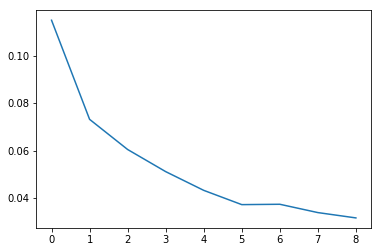

In [227]:
from scipy import cluster
initial = [cluster.vq.kmeans(df_norm_nona.as_matrix(),i) for i in range(1,10)]
plt.plot([var for (cent,var) in initial])
plt.show()

#### Using 5 clusters based on the elbow in skree plot

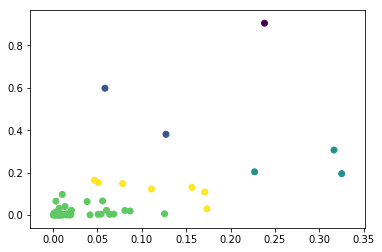

In [228]:
cent, var = initial[4]
#use vq() to get as assignment for each obs.
assignment,cdist = cluster.vq.vq(df_norm_nona.as_matrix(),cent)
plt.scatter(df_norm_nona.as_matrix()[:,0], df_norm_nona.as_matrix()[:,1], c=assignment)
plt.show()